In [22]:
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
# sympy는 심볼릭 연산(symbolic operation)을 
# 지원하기 위한 파이썬 패키지이다.
import sympy
# Juypter 노트북에서 수학식의 LaTeX 표현을 위해 필요함
sympy.init_printing(use_latex='mathjax')  



In [ ]:
"""
최적화(optimization)

예측 문제의 최종 목표는 실제 출력값 즉 타켓(target)값과 
가장 유사한 값을 출력하는 즉, 예측 오차를 최소화하는 모형을 찾는 것이다. 
이 때 우리가 설정할 수 있는 숫자는 예측 모형의 모수(parameter)이다.
따라서 모수를 입력으로 하고 예측 오차를 출력으로 하는 함수 관계가 성립한다.

모수 --f(x)---> 예측 오차

 
이 함수를 최소화하는 모수를 찾는 문제를 최적화(optimization) 문제라고 한다.
"""

In [40]:
# 다음은 1차원 목적 함수의 예이다. 
# 그래프에서 이 목적 함수  f1(x)f1(x) 의 최저점은 
#  2 임을 알 수 있다.
x = sympy.symbols("x")
def f1(x):
    return (x - 2)**2 + 2
(x - 2)**2 + 2

[ 11.          10.69952046  10.40414243  10.11386593   9.82869095
   9.54861749   9.27364555   9.00377512   8.73900622   8.47933884
   8.22477298   7.97530864   7.73094582   7.49168452   7.25752474
   7.02846648   6.80450974   6.58565453   6.37190083   6.16324865
   5.95969799   5.76124885   5.56790123   5.37965514   5.19651056
   5.0184675    4.84552597   4.67768595   4.51494745   4.35731048
   4.20477502   4.05734109   3.91500867   3.77777778   3.6456484
   3.51862055   3.39669421   3.2798694    3.16814611   3.06152433
   2.96000408   2.86358535   2.77226814   2.68605244   2.60493827
   2.52892562   2.45801449   2.39220488   2.33149679   2.27589022
   2.22538516   2.17998163   2.13967962   2.10447913   2.07438017
   2.04938272   2.02948679   2.01469238   2.00499949   2.00040812
   2.00091827   2.00652995   2.01724314   2.03305785   2.05397408
   2.07999184   2.11111111   2.1473319    2.18865422   2.23507805
   2.28660341   2.34323028   2.40495868   2.47178859   2.54372003
   2.620752

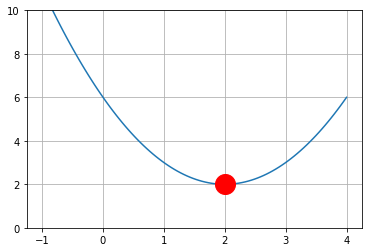

In [24]:
xx = np.linspace(-1, 4, 100)
plt.plot(xx, f1(xx))
plt.plot(2, 2, "ro", markersize=20)
plt.ylim(0, 10)
plt.grid()
plt.show()

In [ ]:
"""
SciPy를 이용한 최적화

SciPy의 optimize 서브 패키지는 최적화 명령 minimize 를 제공한다.
 세부적인 알고리즘은 method 인수로 선택할 수 있다. 
 디폴트 알고리즘은 BFGS 방법이다.

minimize 명령으로 위에서 예로 들었던 1차원 함수를 최적화하면 다음과 같다.

"""

In [34]:
import scipy as sp
result = sp.optimize.minimize(f1, 0)
result


      fun: 2.0
 hess_inv: array([[ 0.5]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([ 1.99999999])

In [66]:
# 다음은 2차원 목적 함수의 예로 
# 2차원 Rosenbrock 함수  f2(x,y)f2(x,y) 를 보였다.
y = sympy.symbols("y")
def f2(x, y):
    return (1 - x)**2 + 100.0 * (y - x**2)**2
(1 - x)**2 + 100.0 * (y - x**2)**2

                            2
        2         ⎛   2    ⎞ 
(-x + 1)  + 100.0⋅⎝- x  + y⎠ 

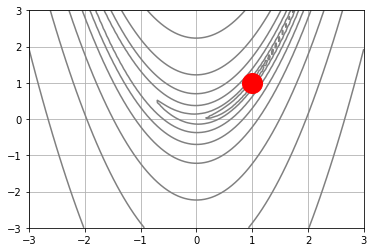

In [48]:
xx = np.linspace(-3, 3, 100)
yy = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

plt.contour(X, Y, Z, colors="gray", levels=[0.7, 3, 15, 50, 150, 500, 1500, 5000])
plt.plot(1, 1, 'ro', markersize=20)
plt.grid()
plt.show()

In [70]:
# minimize 명령으로 다변수 함수를 최적화하는 경우에는 
# 목적 함수가 벡터 인수를 가져야 한다.


result = sp.optimize.minimize(f2, 1, 1)
print(result)


      fun: array([ 0.])
 hess_inv: array([[1]])
      jac: array([  5.97536573e-06])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 1.])
